### Exercise
In exercise folder (same level as this notebook on github) there is hiring.csv. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

2 yr experience, 9 test score, 6 interview score

12 yr experience, 10 test score, 10 interview score

In [3]:
import numpy as np
import pandas as pd
from sklearn import linear_model

In [5]:
df=pd.read_csv('02.hiring.csv')

In [6]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


# Data Preprocessing

Following dataset needs preprocessing, as some rows have null values as well as experience column is in words it needs to be converted into numerical values

In [7]:
exp={'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9,'ten':10,'eleven':11}
df.replace({'experience':exp},inplace=True)

In [8]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [9]:
df.experience.fillna(0,inplace=True)

In [10]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [11]:
df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median(),inplace=True)

In [12]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


Hence, Now the data is clean and ready to be passed to the model

In [13]:
reg=linear_model.LinearRegression()

In [14]:
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [15]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [16]:
reg.intercept_

17737.263464337688

In [45]:
reg.predict([[2,9,6]])

C:\Users\Prathamesh Patil\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [46]:
reg.predict([[12,10,10]])

C:\Users\Prathamesh Patil\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

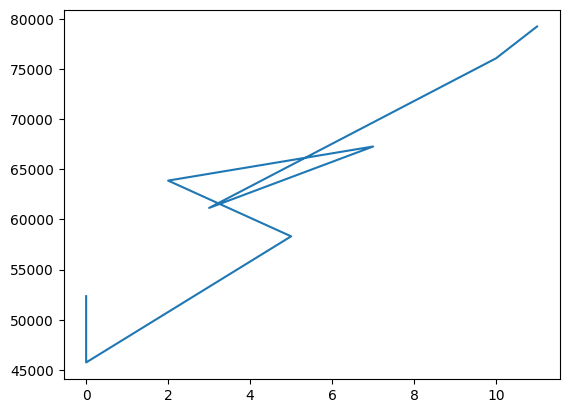

In [56]:
# plt.plot(df['experience'],df['salary($)'])
# plt.plot(df['test_score(out of 10)'],df['salary($)'])
# plt.plot(df['interview_score(out of 10)'],df['salary($)'])
plt.plot(df[['experience']],reg.predict(df[['experience','test_score(out of 10)','interview_score(out of 10)']]))

In [1]:
import pickle

In [17]:
with open('model_pickle','wb') as f:
    pickle.dump(reg,f)

In [20]:
with open('model_pickle','rb') as f:
    mod=pickle.load(f)

In [21]:
mod.predict([[2,9,6]])

C:\Users\Prathamesh Patil\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [22]:
import joblib

In [24]:
joblib.dump(reg,'joblib_loaded_model')

['joblib_loaded_model']

In [25]:
mod1=joblib.load('joblib_loaded_model')

In [26]:
mod.predict([[2,9,6]])

C:\Users\Prathamesh Patil\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])